In [1]:
!pip install pandas

import pandas as pd
df=pd.read_csv("80_Train.csv",sep=",")



     |████████████████████████████████| 11.5 MB 6.1 MB/s eta 0:00:01    |██████████████▎                 | 5.1 MB 9.3 MB/s eta 0:00:01
     |████████████████████████████████| 15.7 MB 12.0 MB/s eta 0:00:01


In [2]:
x_columns=df.columns
x = df[x_columns].values
y = df['RF'].values

In [7]:
! pip install tensorflow


     |████████████████████████████████| 454.3 MB 24 kB/s s eta 0:00:01  |▎                               | 3.7 MB 351 kB/s eta 0:21:23     |████▎                           | 61.4 MB 9.0 MB/s eta 0:00:44     |██████████▍                     | 148.3 MB 18.0 MB/s eta 0:00:18     |████████████▌                   | 176.9 MB 22.3 MB/s eta 0:00:13     |██████████████                  | 198.7 MB 14.3 MB/s eta 0:00:18     |███████████████▌                | 220.4 MB 20.5 MB/s eta 0:00:12     |███████████████▋                | 221.9 MB 20.5 MB/s eta 0:00:12     |███████████████▊                | 222.5 MB 20.5 MB/s eta 0:00:12     |██████████████████▌             | 263.2 MB 6.1 MB/s eta 0:00:32     |██████████████████▋             | 263.8 MB 6.1 MB/s eta 0:00:32     |███████████████████             | 270.4 MB 3.2 MB/s eta 0:00:58     |████████████████████            | 282.7 MB 3.2 MB/s eta 0:00:55     |████████████████████            | 283.4 MB 11.9 MB/s eta 0:00:15     |████████████████████████▍ 

In [4]:
conda install keras

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: / 
Note: you may need to restart the kernel to use updated packages.


In [5]:
 conda install scikit-learn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.5.30  |       ha878542_0         136 KB  conda-forge
    certifi-2021.5.30          |   py37h89c1867_0         141 KB  conda-forge
    joblib-1.0.1               |     pyhd8ed1ab_0         206 KB  conda-forge
    libblas-3.9.0              |11_linux64_openblas          12 KB  conda-forge
    libcblas-3.9.0             |11_linux64_openblas          11 KB  conda-forge
    libgcc-ng-11.1.0           |       hc902ee8_8         908 KB  conda-forge
    libgfortran-ng-11.1.0      |       h69a702a_8          19 KB  conda

In [27]:
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping


kf = KFold(5, shuffle=True, random_state=42) # Use for KFold classification
    
out_of_sample_y = []
out_of_sample_pred = []
fold = 0
for train, test in kf.split(x):
    fold+=1
    print(f"Fold #{fold}")
        
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
    
    model = Sequential()
    model.add(Dense(128, input_dim=x.shape[1], activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_absolute_error', optimizer='adam')
    
  
    model.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=2,
              epochs=40)
    
    pred = model.predict(x_test)
    
    out_of_sample_y.append(y_test)
    out_of_sample_pred.append(pred)    

    # Measure this fold's RMSE
    score = np.sqrt(metrics.mean_absolute_error(pred,y_test))
    print(f"Fold score (MAE): {score}")
# Build the oos prediction list and calculate the error.
out_of_sample_y = np.concatenate(out_of_sample_y)
out_of_sample_pred = np.concatenate(out_of_sample_pred)




score = np.sqrt(metrics.mean_absolute_error(out_of_sample_pred,out_of_sample_y))
print(f"Final, out of sample score (RMSE): {score}")
    


Fold #1
Epoch 1/40
2/2 - 0s - loss: 0.5587 - val_loss: 0.4438
Epoch 2/40
2/2 - 0s - loss: 0.3854 - val_loss: 0.2872
Epoch 3/40
2/2 - 0s - loss: 0.2958 - val_loss: 0.2521
Epoch 4/40
2/2 - 0s - loss: 0.2706 - val_loss: 0.2400
Epoch 5/40
2/2 - 0s - loss: 0.2304 - val_loss: 0.2164
Epoch 6/40
2/2 - 0s - loss: 0.2249 - val_loss: 0.1840
Epoch 7/40
2/2 - 0s - loss: 0.1904 - val_loss: 0.1530
Epoch 8/40
2/2 - 0s - loss: 0.1418 - val_loss: 0.1420
Epoch 9/40
2/2 - 0s - loss: 0.1061 - val_loss: 0.1501
Epoch 10/40
2/2 - 0s - loss: 0.1062 - val_loss: 0.1567
Epoch 11/40
2/2 - 0s - loss: 0.1321 - val_loss: 0.1501
Epoch 12/40
2/2 - 0s - loss: 0.1298 - val_loss: 0.1396
Epoch 13/40
2/2 - 0s - loss: 0.1078 - val_loss: 0.1231
Epoch 14/40
2/2 - 0s - loss: 0.0865 - val_loss: 0.1059
Epoch 15/40
2/2 - 0s - loss: 0.1149 - val_loss: 0.1010
Epoch 16/40
2/2 - 0s - loss: 0.1008 - val_loss: 0.1009
Epoch 17/40
2/2 - 0s - loss: 0.1057 - val_loss: 0.0997
Epoch 18/40
2/2 - 0s - loss: 0.1008 - val_loss: 0.0994
Epoch 19/40

In [12]:
conda install matplotlib

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cycler-0.10.0              |             py_2           9 KB  conda-forge
    dbus-1.13.6                |       h48d8840_2         572 KB  conda-forge
    expat-2.4.1                |       h9c3ff4c_0         182 KB  conda-forge
    fontconfig-2.13.1          |    hba837de_1005         357 KB  conda-forge
    freetype-2.10.4            |       h0708190_1         890 KB  conda-forge
    gettext-0.19.8.1           |    h0b5b191_1005         3.6 MB  conda-forge
    glib-2.68.3                |       h9c3ff4c_0         449 KB  conda-forge

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy-1.21.1.dist-info/METADATA'



Text(0, 0.5, 'Predicted')

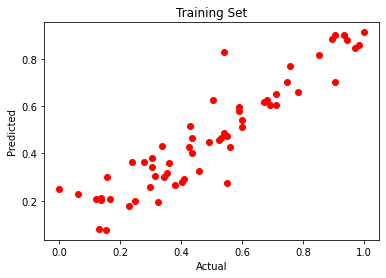

In [13]:

import matplotlib.pyplot as plt
resultsTest = np.genfromtxt("80_Train.csv",
 delimiter=",")
plt.plot(out_of_sample_y, #training Y value
 out_of_sample_pred, #predicted Y value
 'ro') #red dots
plt.title('Training Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [28]:
from sklearn.metrics import r2_score
testR2 = r2_score(out_of_sample_pred, out_of_sample_y)

In [29]:
print(testR2)

0.8681676929616919
